<a href="https://colab.research.google.com/github/22f2001443/ideas_internship_notebook/blob/main/notebook_1_covid19_TS/Visualizing_Time_Series_Dataset_COVID_19_Data_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

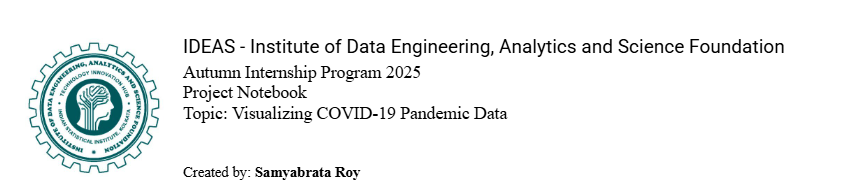

# Notebook: 1

👋 Welcome students!

In this journey, we’re going to take a dataset and slowly uncover the story it tells through visualization. Numbers by themselves can feel cold and endless, but once we turn them into visuals, they begin to speak.


---



##📖 Introduction

When the COVID-19 pandemic began, the world was flooded with numbers — daily cases, recoveries, deaths, and later vaccinations. Looking at endless tables of figures wasn’t just boring, it was confusing.

But the moment those numbers were drawn into curves, bars, and maps, they started to make sense. Suddenly, we could see when cases were rising, where outbreaks were spreading, and how vaccinations were helping. The data wasn’t just numbers anymore — it was a story of how the world was coping.

That’s the real power of visualization. It’s not about making charts look pretty — it’s about making data human, so that anyone, not just experts, can understand what’s happening.

In this notebook, we’ll take COVID-19 data and learn step by step how to explore and visualize it using Python. Some of the code will be ready for you, while some parts will be left for you to try on your own. By the end, you’ll see how visualization can transform raw data into meaningful insights — and how those insights help us understand events that shape our lives.



---

## 📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**  
   *(Hint: Think about data that is recorded over time — like daily COVID-19 cases.)*

2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
   Feel free to share your honest opinion — there’s no right or wrong answer here!  

---

## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the COVID-19 dataset.  


In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [4]:
# Replace with your Google Drive file ID which has public view access
file_id = "1Sj3Il94NXun9owedSWNGrxszjpAXTDEQ"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Read CSV directly into pandas
df = pd.read_csv(url)

# Show first few rows
print(df.head())

  Date_reported Country_code     Country WHO_region  New_cases  \
0    2020-01-04           AI    Anguilla        AMR        NaN   
1    2020-01-04           AZ  Azerbaijan        EUR        NaN   
2    2020-01-04           BD  Bangladesh       SEAR        0.0   
3    2020-01-04           BB    Barbados        AMR        NaN   
4    2020-01-04           BR      Brazil        AMR        NaN   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0         NaN                  0  
1                 0         NaN                  0  
2                 0         0.0                  0  
3                 0         NaN                  0  
4                 0         NaN                  0  


## Subsetting the Dataset for Analysis

To simplify the study, I will take a subset of the dataset containing only the most relevant columns:

- **Date_reported**
- **Country**
- **WHO_region**
- **New_cases**
- **New_deaths**
- **Cumulative_cases**
- **Cumulative_deaths**

This subset will allow me to focus on the essential variables required for exploratory data analysis (EDA).  


In [5]:
# Subsetting the dataset for analysis
subset_cols = [
    "Date_reported",
    "Country",
    "WHO_region",
    "New_cases",
    "New_deaths",
    "Cumulative_cases",
    "Cumulative_deaths"
]

df_subset = df[subset_cols].copy()

Subset shape: (491040, 7)
  Date_reported     Country WHO_region  New_cases  New_deaths  \
0    2020-01-04    Anguilla        AMR        NaN         NaN   
1    2020-01-04  Azerbaijan        EUR        NaN         NaN   
2    2020-01-04  Bangladesh       SEAR        0.0         0.0   
3    2020-01-04    Barbados        AMR        NaN         NaN   
4    2020-01-04      Brazil        AMR        NaN         NaN   

   Cumulative_cases  Cumulative_deaths  
0                 0                  0  
1                 0                  0  
2                 0                  0  
3                 0                  0  
4                 0                  0  


### Date Trimming  

Since our dataset contains records over a wide range of dates, we may not always need the full timeline for analysis.  
To make the dataset more relevant and manageable, we will **filter the data based on a specific date range**.  

This allows us to:  
- Focus on a particular period of interest (e.g., second wave, third wave, or vaccination drive).  
- Reduce noise from irrelevant dates.  
- Improve the clarity of visualizations by narrowing down to meaningful time windows.  

By trimming the data to the required start and end dates, we ensure that our analysis stays **targeted and insightful**.  

#### Here start date is chosen as 1st of Mar 2020 & end date is choosen as 31st of Aug 2023 as according to WHO, they stopped requiring daily basis data reporting since August 2023

In [10]:
# Assuming your dataframe is named df and Date_reported is already in datetime format
df_subset['Date_reported'] = pd.to_datetime(df_subset['Date_reported'])

# Define the date range
start_date = "2020-03-01"
end_date = "2023-08-31"

# Filter the rows
trimmed_df = df_subset[(df_subset['Date_reported'] >= start_date) & (df_subset['Date_reported'] <= end_date)]

# Check subset
print("Subset shape:", trimmed_df.shape)
print(trimmed_df.head())
print(trimmed_df.tail())

Subset shape: (306960, 7)
      Date_reported  Country WHO_region  New_cases  New_deaths  \
13680    2020-03-01    Yemen        EMR        NaN         NaN   
13681    2020-03-01  Uruguay        AMR        NaN         NaN   
13682    2020-03-01  Ukraine        EUR        NaN         NaN   
13683    2020-03-01  Tunisia        EMR        NaN         NaN   
13684    2020-03-01    Sudan        EMR        NaN         NaN   

       Cumulative_cases  Cumulative_deaths  
13680                 0                  0  
13681                 0                  0  
13682                 0                  0  
13683                 0                  0  
13684                 0                  0  
       Date_reported                           Country WHO_region  New_cases  \
320635    2023-08-31                        Tajikistan        EUR        NaN   
320636    2023-08-31                         Sri Lanka       SEAR        0.0   
320637    2023-08-31                   Solomon Islands        WPR  

## EDA including visualization

In the EDA, I will perform the following visualizations:

1. **Line plots for daily cases in the top 5 affected countries**  
   (Initially with Matplotlib to highlight limitations, then with Plotly for interactivity).

2. **Stacked bar chart for total cumulative deaths by WHO region**  
   (To show region was more saceptable to COVID-19).  

3. **Interactive dashboard using Plotly**  
   (To provide a dynamic interface for exploring cases, deaths, and vaccinations).  

4. **Heatmap of case intensity by date and region**  
   (To visualize hotspots and the spread over time).  




---


### Plot 1

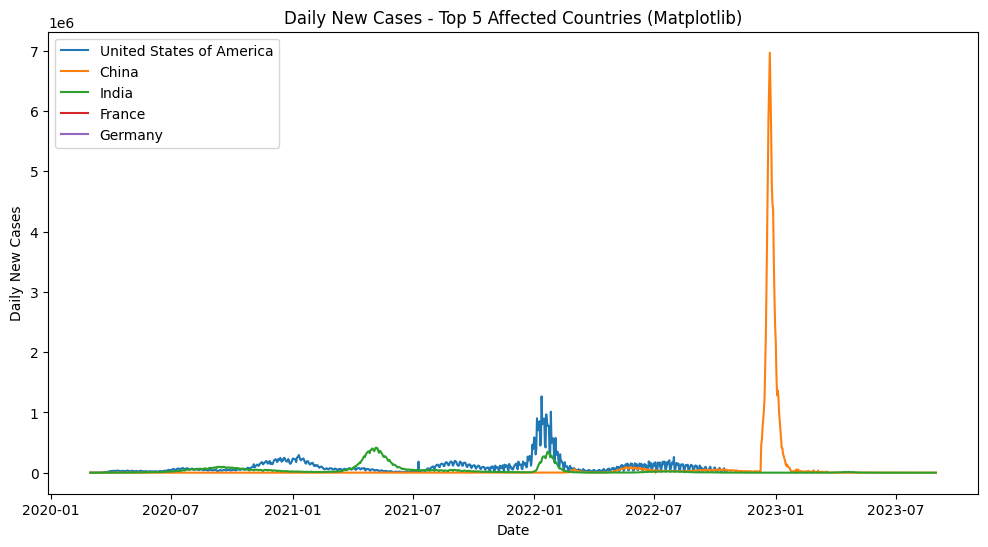

In [12]:
# 1. Line plots for daily cases in the top 5 affected countries

# Find top 5 affected countries by cumulative cases
top5_countries = (
    trimmed_df.groupby("Country")["Cumulative_cases"]
    .max()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter data
df_top5 = trimmed_df[trimmed_df["Country"].isin(top5_countries)]

# Plotting the data based on daily new cases
plt.figure(figsize=(12,6))
for country in top5_countries:
    country_data = df_top5[df_top5["Country"] == country]
    plt.plot(country_data["Date_reported"], country_data["New_cases"], label=country)

plt.xlabel("Date")
plt.ylabel("Daily New Cases")
plt.title("Daily New Cases - Top 5 Affected Countries (Matplotlib)")
plt.legend()
plt.show()


## Question:
What we should have done instade to plot the top 5 countries least affected by COVID-19?



---

### Plot 2

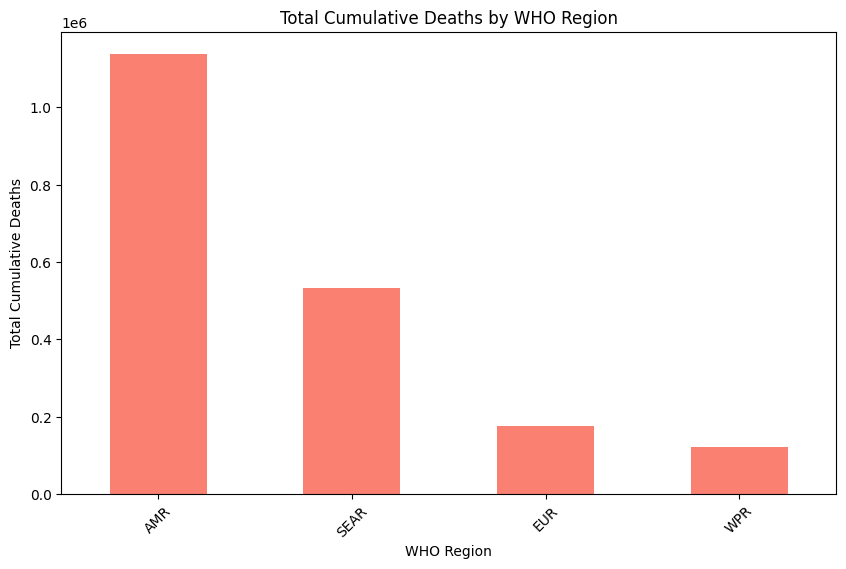

In [17]:
# 2. Bar chart of total cumulative deaths by WHO region
region_deaths = (
    df_subset.groupby("WHO_region")["Cumulative_deaths"]
    .max()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
region_deaths.plot(kind="bar", color="salmon")
plt.xlabel("WHO Region")
plt.ylabel("Total Cumulative Deaths")
plt.title("Total Cumulative Deaths by WHO Region")
plt.xticks(rotation=45)
plt.show()


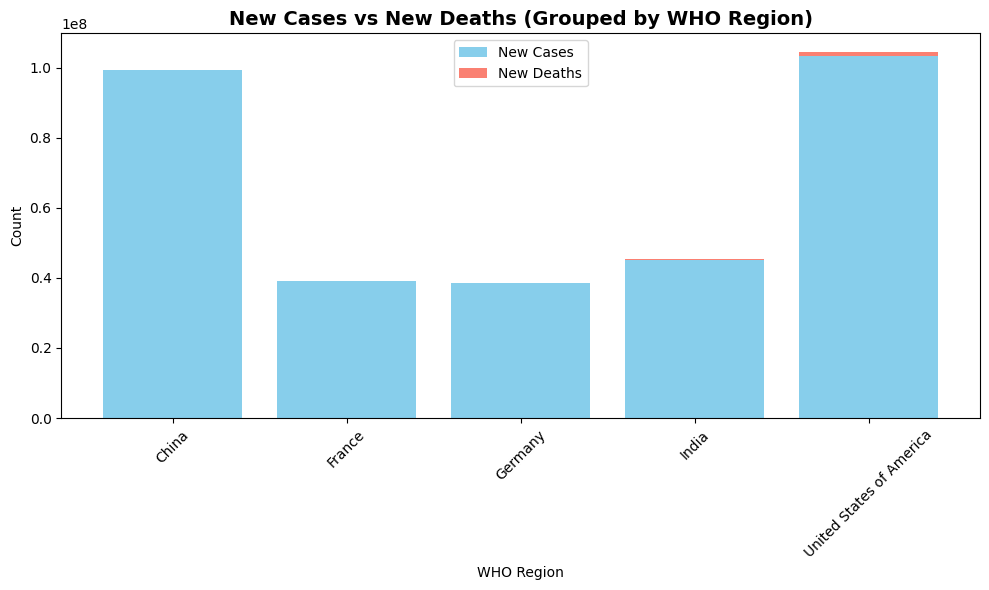

In [18]:
# Step 1: Group data by WHO region
region_summary = df_top5.groupby("Country")[["New_cases", "New_deaths"]].sum().reset_index()

# Step 2: Create Stacked Bar Chart
plt.figure(figsize=(10,6))
plt.bar(region_summary["Country"], region_summary["New_cases"], label="New Cases", color="skyblue")
plt.bar(region_summary["Country"], region_summary["New_deaths"],
        bottom=region_summary["New_cases"], label="New Deaths", color="salmon")

# Step 3: Customize Plot
plt.title("New Cases vs New Deaths (Grouped by WHO Region)", fontsize=14, fontweight="bold")
plt.xlabel("WHO Region")
plt.ylabel("Count")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Step 4: Show Plot
plt.show()



---

### Plot 3